In [2]:
using Pkg
Pkg.activate("../")

using Base.Filesystem

# This is to read wav files.
# See: https://github.com/dancasimiro/WAV.jl
using WAV

using Plots
pyplot()

using Revise
using SpeechFeatures
using FFTW 
using PaddedViews

 Activating environment at `~/GithubRepositories/SpeechFeatures/Project.toml`
┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1260
┌ Info: Precompiling SpeechFeatures [6f3487c4-5ca2-4050-bfeb-2cf56df92307]
└ @ Base loading.jl:1260


Download an example audio file from the TIMIT corpus.

In [3]:
if ! isfile("LDC93S1.wav")
    run(`wget https://catalog.ldc.upenn.edu/desc/addenda/LDC93S1.wav`)
end

Load the audio file

In [4]:
x, srate = wavread("LDC93S1.wav")

println("sampling freq: $srate Hz\nduration: $(round(length(x) / srate, digits=2)) s")

sampling freq: 16000.0 Hz
duration: 2.92 s


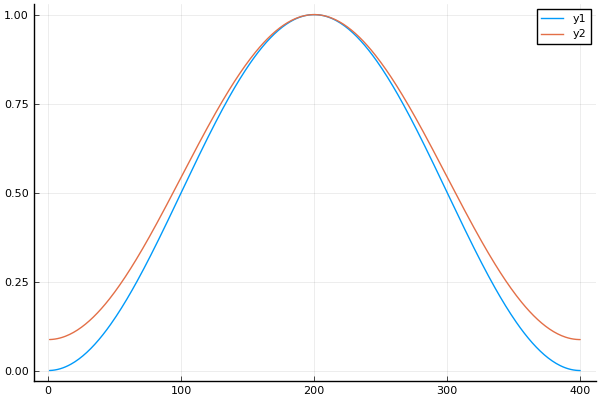

In [14]:
hann = HannWindow(Float32, 400)
hamming = HammingWindow(400)
plot(hann)
plot!(hamming)

In [5]:
removedc!(x[:, 1])

46797-element Array{Float64,1}:
  3.866447400074623e-5
 -2.2372544951248154e-5
  6.918298347674342e-5
  8.145964524749038e-6
  8.145964524749038e-6
  9.970149295274061e-5
  8.145964524749038e-6
  3.866447400074623e-5
 -8.340956390324254e-5
 -5.289105442724535e-5
  6.918298347674342e-5
  3.866447400074623e-5
  8.145964524749038e-6
  ⋮
 -0.00029703913023522286
 -8.340956390324254e-5
  8.145964524749038e-6
  9.970149295274061e-5
  0.0001302200024287378
  9.970149295274061e-5
  0.000160738511904735
  0.000160738511904735
  0.0001302200024287378
 -2.2372544951248154e-5
 -0.00014444658285523693
 -0.0002360021112832285

In [60]:
framelength = Int64(0.025 * srate)
hopsize = Int64(0.01 * srate)
(length(x) - framelength) ÷ hopsize

289

In [64]:
X = hcat(frames(x[:, 1], srate, 0.025, 0.01)...)
size(X)

(400, 289)

In [82]:
win = X[:, 1]
pwin = PaddedView(win[1], win[1:end-1], (length(win),))
win .-= pwin * 0.97

400-element Array{Float64,1}:
  9.155552842799158e-7
 -9.155552842799158e-7
  1.8311105685598315e-6
  0.0
  0.0
  2.7466658528397473e-6
  0.0
  9.155552842799158e-7
 -2.7466658528397473e-6
 -1.8311105685598315e-6
  1.8311105685598315e-6
  9.155552842799158e-7
  0.0
  ⋮
  3.662221137119663e-6
  4.577776421399579e-6
  4.577776421399579e-6
  1.8311105685598315e-6
  2.7466658528397473e-6
  9.155552842799158e-7
 -9.155552842799158e-7
  4.577776421399579e-6
  9.155552842799158e-7
  2.7466658528397473e-6
  2.7466658528397473e-6
  6.19525742362743e-5

In [63]:
t = framelength
fftlen = Int(2^ceil(log2(t)))
#fft_len = 2^(np.floor(np.log2(win_len))+1).astype('int'))


512

In [75]:
pX = PaddedView(0, X, (fftlen, 289))
stft = rfft(pX, 1)

257×289 Array{Complex{Float64},2}:
     0.033021+0.0im          …     0.0269478+0.0im
   -0.0088443-0.00691887im       -0.00498785-0.00322214im
  -0.00169133-0.00279423im         0.0021543-0.00440295im
  0.000307404-0.00311393im        0.00213332-0.00366493im
   0.00537265-0.000611215im       0.00275524+0.00139746im
 -0.000731351-0.00055838im   …    0.00147475+0.000518783im
  -0.00306564-0.00499422im        0.00258501-0.00240728im
  -0.00221077-0.00173646im       -0.00124662-0.0020841im
   0.00198781+0.000518612im       0.00200907+0.0015843im
   -0.0022523-0.00219729im        0.00793936+0.00171576im
  -0.00395016+0.00133512im   …   -0.00260797-0.00185505im
  0.000393942+6.2406e-5im         0.00383479-0.00193845im
 -0.000672897-0.000490285im      -8.80016e-5-0.00530172im
             ⋮               ⋱  
   0.00150851-0.00143921im   …   -0.00037008+0.000392139im
 -0.000178301-0.000123209im      0.000840224-0.00101008im
 -0.000962529+0.000701426im      0.000492232+0.000510077im
  -0.00153

In [10]:
x[:, 1]

46797-element Array{Float64,1}:
  3.051850947599719e-5
 -3.051850947599719e-5
  6.103701895199438e-5
  0.0
  0.0
  9.155552842799158e-5
  0.0
  3.051850947599719e-5
 -9.155552842799158e-5
 -6.103701895199438e-5
  6.103701895199438e-5
  3.051850947599719e-5
  0.0
  ⋮
 -0.0003051850947599719
 -9.155552842799158e-5
  0.0
  9.155552842799158e-5
  0.00012207403790398877
  9.155552842799158e-5
  0.00015259254737998596
  0.00015259254737998596
  0.00012207403790398877
 -3.051850947599719e-5
 -0.00015259254737998596
 -0.00024414807580797754